<h3> Session 8 </h4>

<I>

### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.optim.lr_scheduler import MultiStepLR


import sys
sys.path.append('../')

# Loading classes from py files
from model import Net
from utils import Utility
from constants import *
from dataset import *
from transforms import *
from train import train, test, plot_loss_accuracy, plot_misclassified
from misclassified import *

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()

print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000001BFCB5A8280>
Device available for the script - cuda


##### Create Batch loader for train/test dataset  <hr>

In [4]:
get_data = Dataset(batch_size=64)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([64, 3, 32, 32])
Total images in the batch - 64


##### View sample images from the train loader  <hr>



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


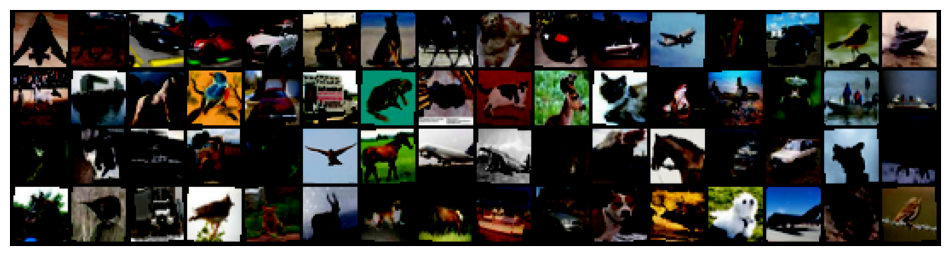

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#get_utilitites.plot_grid(train_loader)
get_utilitites.show_batch(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net(normalization='gn').to(device)

summary(model, input_size=(3, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 28, 28]             648
              ReLU-2           [-1, 24, 28, 28]               0
         GroupNorm-3           [-1, 24, 28, 28]              48
           Dropout-4           [-1, 24, 28, 28]               0
            Conv2d-5           [-1, 24, 28, 28]           5,184
              ReLU-6           [-1, 24, 28, 28]               0
         GroupNorm-7           [-1, 24, 28, 28]              48
           Dropout-8           [-1, 24, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             384
             ReLU-10           [-1, 16, 28, 28]               0
        MaxPool2d-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 24, 14, 14]           3,456
             ReLU-13           [-1, 24, 14, 14]               0
        GroupNorm-14           [-1, 24,

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[8,12], gamma=0.1)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test_loss = test(model, device, test_loader)
  scheduler.step(test_loss)

Epoch 1


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 1.4386, Accuracy: 4728/10000 (47.28%)

Epoch 2


e:\Softwares\Apps\Anaconda\envs\era\lib\site-packages\torch\optim\lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 1.1711, Accuracy: 5812/10000 (58.12%)

Epoch 3


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 1.0553, Accuracy: 6303/10000 (63.03%)

Epoch 4


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.9808, Accuracy: 6606/10000 (66.06%)

Epoch 5


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.8975, Accuracy: 6932/10000 (69.32%)

Epoch 6


  0%|          | 0/782 [00:05<?, ?it/s]


Test set: Average loss: 0.8516, Accuracy: 7063/10000 (70.63%)

Epoch 7


  0%|          | 0/782 [00:05<?, ?it/s]


Test set: Average loss: 0.9067, Accuracy: 6882/10000 (68.82%)

Epoch 8


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.8127, Accuracy: 7237/10000 (72.37%)

Epoch 9


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7740, Accuracy: 7349/10000 (73.49%)

Epoch 10


  0%|          | 0/782 [00:06<?, ?it/s]


Test set: Average loss: 0.8120, Accuracy: 7191/10000 (71.91%)

Epoch 11


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7820, Accuracy: 7290/10000 (72.90%)

Epoch 12


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7606, Accuracy: 7397/10000 (73.97%)

Epoch 13


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7428, Accuracy: 7423/10000 (74.23%)

Epoch 14


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7451, Accuracy: 7433/10000 (74.33%)

Epoch 15


  0%|          | 0/782 [00:03<?, ?it/s]


Test set: Average loss: 0.7652, Accuracy: 7411/10000 (74.11%)



Plot the Loss/Accuracy for Train/Test dataset

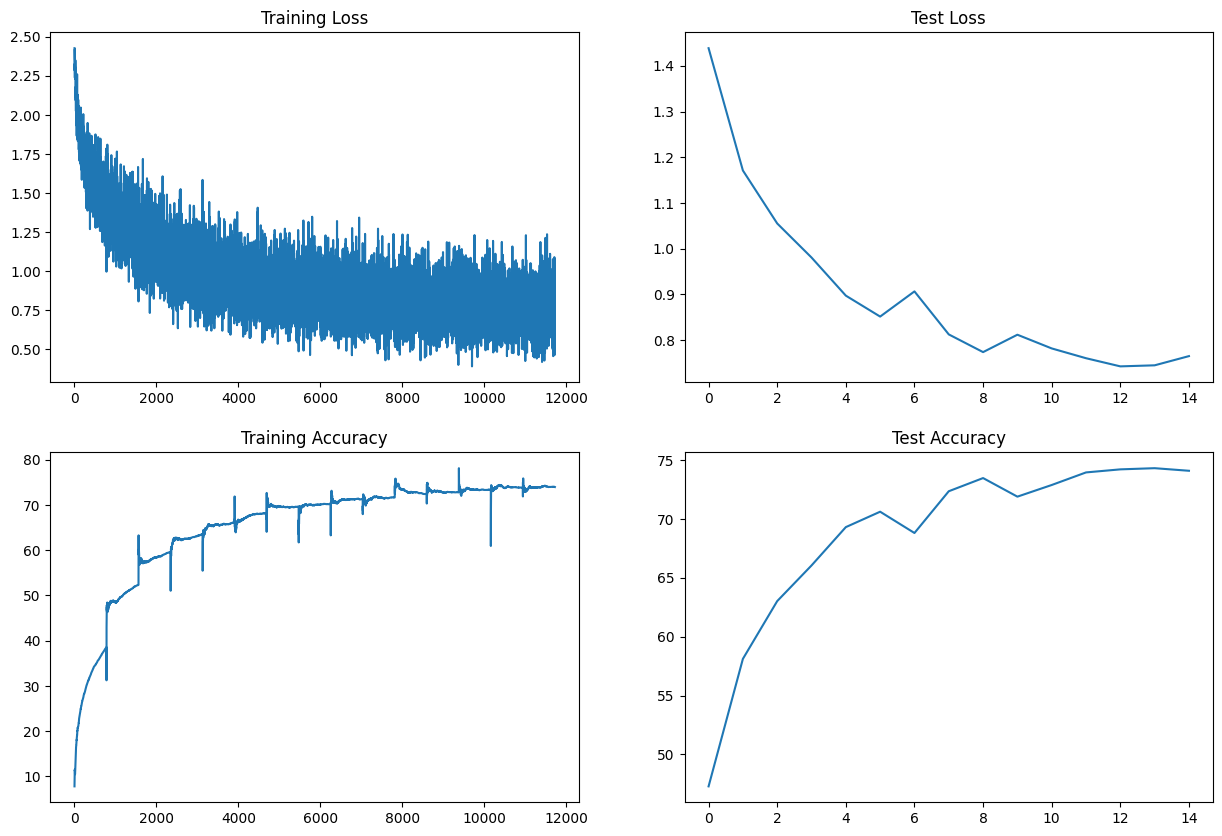

In [9]:
plot_loss_accuracy()

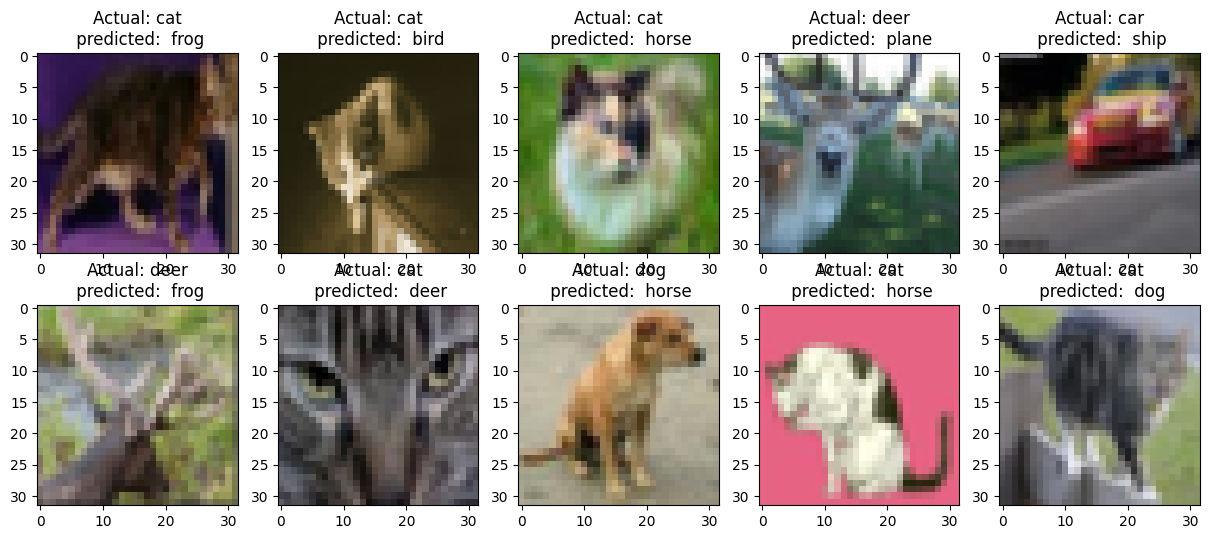

In [10]:
images, actuals, preds = test_misclassified(model,device,test_loader)
plot_images(images, actuals, preds, classes)